![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [59]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

<BarContainer object of 4 artists>

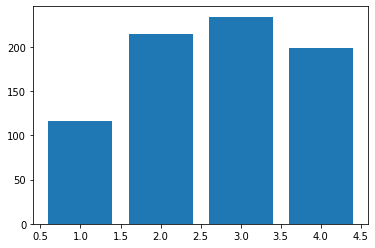

In [60]:
plt.bar(bikes.groupby('season').total.mean().index,bikes.groupby('season').total.mean())

In [61]:
bikes.groupby('season').describe()['total']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


<Axes: xlabel='season', ylabel='total'>

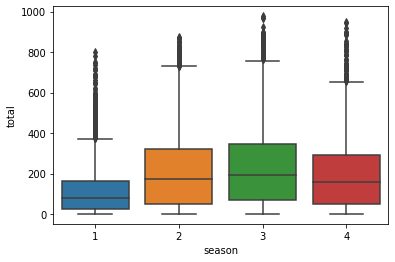

In [57]:
sns.boxplot(data=bikes, x='season', y= 'total', showfliers=True)

### Análisis Variable 'season'
1:winter, 2:spring, 3:summer, 4:fall

Es posible observar inicialmente, que la estación que tiene un valor promedio mayor de alquiler día-hora de bicicletas  corresponde al valor 3 (summer/verano), con un valor de 234 bicicletas en promedio día-hora, seguida del valor 2 (spring/primavera) con un valor de 215 alquileres en promedio día-hora y por ultimo las estaciones de otoño e invierno con valores de 198 y 116 alquileres en promedio día-hora correspondientemente. Ahora, observando valores de la distribución de alquileres agrupados por la variable season, vemos que la estación 1 (springer/primavera) tiene una alta concentración de outliers, su media es de 125 alquileres día-hora, sin embargo, se observa que hay múltiples puntos que oscilan entre los 400 y 800 alquileres día-hora, registrando los valores intercuartílicos más pequeños. Las estaciones 2 y 3 (spring/primavera y summer/verano) presentan una menor concentración de outliers y rangos intercuartílicos y medianas  similares. Por ultimo para la estación 4 (otoño), como era de esperarse por el análisis de medias, posee rangos intercuartílicos más pequeños que sus dos antecesoras. Finalmente, en cuanto a valores mínimos, todas las categorías de la variable season presentan como valor 1 alquiler día-hora y los valores máximos son correspondientes según las distribuciones, a mayores rangos intercuartílicos, mayores valores máximos. Estas distribuciones hacen sentido con el contexto estudiado, pues es de esperarse que cuando el clima sea más complicado (invierno) se vea reducido el número de alquileres promedio, así como se espera que en épocas de vacaciones y mejor clima (verano) se incrementen los estadísticos de los alquileres promedio día-hora.


In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

<BarContainer object of 24 artists>

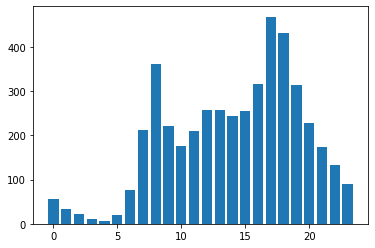

In [63]:
plt.bar(bikes.groupby('hour').total.mean().index,bikes.groupby('hour').total.mean())

<Axes: xlabel='hour', ylabel='total'>

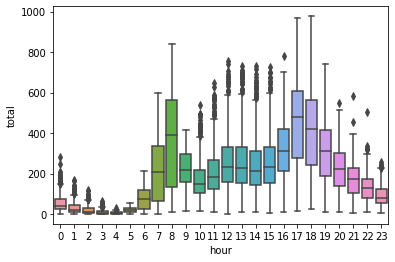

In [67]:
sns.boxplot(data=bikes, x='hour', y= 'total', showfliers=True)

In [65]:
bikes.groupby('hour').describe()['total']

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


### Análisis Variable 'hour'

Es posible observar inicialmente, que las horas de mayor demanda promedio son las 8 am y las 5 y 6 pm, teniendo la mayor densidad de demanda promedio entre las 11 am y las 8 pm y como era de esperarse la demanda es muy baja o casi nula entre las 12 am y las 5 am. Ahora, observando los valores de la distribución nuevamente observamos que las horas con mayores valores intercuartílicas son las 7 am, 8 am, 5 pm, 6 pm y 7 pm. Adicionalmente, se observa cómo después de las 7 pm, progresivamente se disminuyen los rangos intercuartílicos hasta que nuevamente vuelven a incrementar a las 6 am. Estos valores son acordes con el contexto de las personas y los horarios laborales de entrada y salida, que pueden ayudar a describir este comportamiento de las distintas horas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

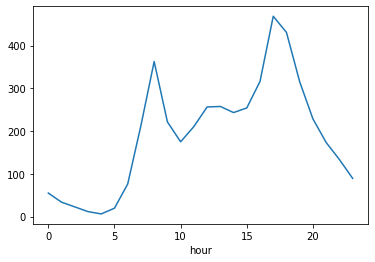

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

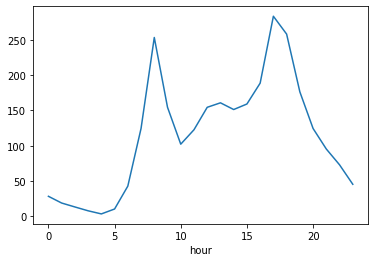

In [68]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season']==1].groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

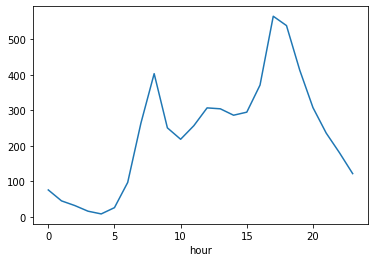

In [69]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season']==3].groupby('hour').total.mean().plot()

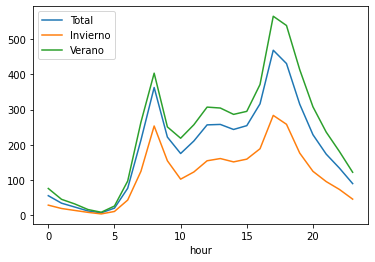

In [77]:
bikes.groupby('hour').total.mean().plot()
bikes[bikes['season']==1].groupby('hour').total.mean().plot()
bikes[bikes['season']==3].groupby('hour').total.mean().plot()
plt.legend(['Total','Invierno','Verano'])

### Análisis

Como era de esperarse y en concordancia con los análisis previos, para la mayoría de las horas del día, durante el verano se presentan valores promedio más altos en comparación con el invierno y en comparación con el total de todos los registros. Es decir, se presentan las mismas tendencias en cada uno de los casos, sin embargo, para invierno cada uno de los promedios de alquiler de bicicletas es mucho menor con respecto a los valores en la tendencia total y en la tendencia del verano. Ahora, en el verano, la tendencia es igual pero los valores un poco más altos en horarios de la mañana con respecto a la tendencia total y bastante mas alta a las 5 pm. 

Nuevamente inferimos que el contexto laboral y climático influye en el comportamiento del alquiler de bicicletas, lo cual se ve reflejado en los datos y en como las tendencias de alquileres se ven influenciadas por las estaciones con climas más amenos y por los horarios que se espera que tengan mayor demanda según el horario laboral.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

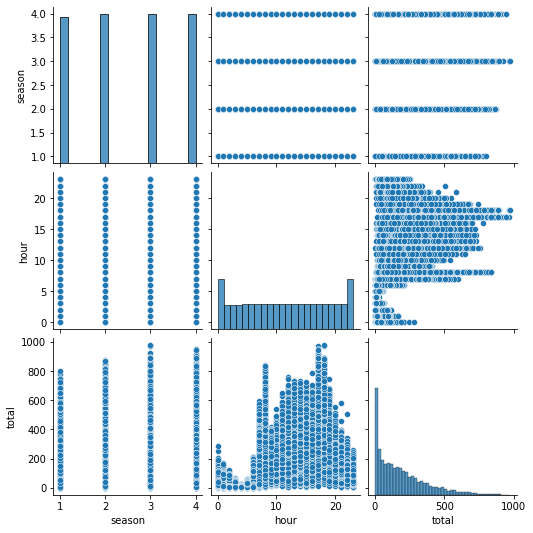

In [88]:
# Correlogramas de las variables predictoras y de respuesta
sns.pairplot(bikes[['season','hour','total']],diag_kind='hist')

In [132]:
#Matriz de correlación
pd.get_dummies(bikes[['season','hour','total']], columns=['season'],drop_first=True).corr()

,hour,total,season_2,season_3,season_4
hour,1.000000,0.400601,-0.002733,-0.002611,-0.002964
total,0.400601,1.000000,0.075681,0.136942,0.023704
season_2,-0.002733,0.075681,1.000000,-0.335214,-0.335296
season_3,-0.002611,0.136942,-0.335214,1.000000,-0.335296
season_4,-0.002964,0.023704,-0.335296,-0.335296,1.000000


In [133]:
# Celda 3
# Sin dummyficar la variable seaason
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

# Ajustamos el las variables predictoras y de respuesta con la variable season categorica.
XTotal = bikes.copy()[['season','hour']]
yTotal = bikes.copy()['total']

# Definimos el train y test set.
XTrain, XTest, yTrain, yTest = train_test_split(XTotal,yTotal,test_size=0.33,random_state=0)

# Declaramos una instancia del modelo
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(XTrain, yTrain)

# Generamos las predicciones
y_pred = lr.predict(XTest)

# observamos el R2 del modelo

lr.score(XTest, yTest)


0.17688537507600843

In [134]:
 lr.coef_

array([28.03619568, 10.57944293])

In [135]:
# Dummyficanod la variable season
# Ajustamos el las variables predictoras y de respuesta.
XTotal = bikes.copy()[['season','hour']]
yTotal = bikes.copy()['total']

# Dummyficamos la variable season
XTotal = pd.get_dummies(XTotal, columns=['season'],drop_first=True)

# Definimos el train y test set.
XTrain, XTest, yTrain, yTest = train_test_split(XTotal,yTotal,test_size=0.33,random_state=0)

# Declaramos una instancia del modelo
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(XTrain, yTrain)

# Generamos las predicciones
y_pred = lr.predict(XTest)

# observamos el R2 del modelo

print('R2:',lr.score(XTest, yTest))


R2: 0.2151771203253332


In [136]:
coefs=pd.DataFrame(lr.coef_,XTotal.columns.to_list(),columns=['coefs'])
print('coeficientes:')
print(coefs,'\n')
print('intercepto:',lr.intercept_)

coeficientes:
               coefs
hour       10.628739
season_2  100.907768
season_3  119.018664
season_4   87.247390 

intercepto: -9.563071266089253


Como es posible observar obtenemos un r2 mejor cuando dummyficamos la variable categórica season, esto era de esperarse, pues no es una variable categórica ordinal, por lo que se hará el análisis sobre el modelo con las variables dummyficadas. Ahora, interpretando los coeficientes betas que resultan del modelo, estos representan el cambio por cada unidad para cada una de las variables manteniendo las demás variables constantes, es decir que si la hora aumenta una unidad, el valor final de la predicción incrementará 10.68 aproximadamente su valor manteniendo las demás variables constantes. Como es posible observar, se le da más peso a las pendientes de las estaciones que a las horas, esto debido a que el modelo detecta que tienen mayor influencia sobre la variable de respuesta que la variable hour. Continuando, como es posible observar, la mayor ganancia, como era de esperarse por el análisis preliminar la da la variable de binaria del verano (season_3), mientras que la menor está dada por la variable del otoño, que corresponde a la estación con menores valores de alquiler después del invierno. Ahora, en cuanto al intercepto, corresponde al valor base cuando todas las demás variables son cero, en este caso es negativo.

Ahora, en cuanto al desempeño del modelo vemos un r2 muy pobre de 0.215 aproximadamente, lo cual está muy alejado del valor máximo (1), por lo que vemos que el modelo de regresión lineal no se ajusta correctamente a las características de las variables de entrenamiento para capturar su relación con la variable de respuesta.

Ahora, este desempeño tan pobre puede deberse a múltiples razones:
1. El modelo de regresión lineal se caracteriza por ser poco flexible y muy rígido, por lo que se puede generar mucho sesgo y muy poca varianza. 
2. Se están usando pocas variables predictoras por lo que puede que no se esté logrando capturar correctamente la naturaleza compleja de la relación, por omisión de información.
3. Los outliers que vimos en los diagramas de cajas y bigotes pueden generar sesgo en el modelo.
4. La relación observada en los diagramas de dispersión para las variables no parece tener una tendencia lineal con respecto a la variable de respuesta. Si la relación entre las variables predictoras y la variable de respuesta no tiene una tendencia lineal, la regresión no puede modelar adecuadamente los datos, resultando en un desempeño pobre.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [237]:
# Celda 4
import numpy as np
# definimos una función que calcula el MSE para iterar sobre el arbol, la predicción se define como el promedio de los valores
# que cumplen con la condición
def mse(y):
    return np.mean((y - np.mean(y))**2)
# Definimos una funcion que calcula el MSE total al sumar el MSE de cada lado
def mse_total(X_col,y,split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    mse_y = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)
    
    mse_total_ = mse_l + mse_r
    
    return mse_total_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        splits = np.unique(X.iloc[:,j])
        
        # Para cada partición
        for split in splits:
            gain = mse_total(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, max_depth=None):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1,max_depth=max_depth)
    tree['sr'] = tree_grow(X_r, y_r, level + 1,max_depth=max_depth)
    
    return tree

def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        predicted = predicted * tree['y_pred']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted

In [251]:
#Generamos el arbol con una profundidad maxima de 6
arbol = tree_grow(XTrain, yTrain, level=0, max_depth=6)
# Generamos las correspondientes predicciones en el conjunto de test
preds_manual = tree_predict(XTest,arbol)

In [252]:
# Calculamos el r2 contra el conjunto de la variable de respuesta de prueba 
r2 = r2_score(yTest,preds_manual)  
r2

0.36481751846447896

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [265]:
# Celda 5
# Probamos con un arbol con max_depth arbitrario y calculamos el r2
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
# inicializamos el modelo
tree = DecisionTreeRegressor(max_depth=6, random_state = 1)
tree.fit(XTrain,yTrain)
y_pred = tree.predict(XTest)
r2_score(yTest,y_pred)

0.5415555450329284

In [175]:
# Con cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
r2_scores = cross_val_score(tree, XTrain,yTrain, cv=10, scoring='r2')

# Calcula la media de los puntajes de R^2
mean_r2_score = np.mean(r2_scores)
mean_r2_score

0.5499199922671651

In [176]:
#Vemos que el r2 mejora un poco con cv, por lo que lo implementamos en la calibración del modelo
# Calibramos el modelo iterando sobre la maxima profundidad del arbol
r2s=[]
max_depth_range = range(1, 21)
for depth in max_depth_range:
    tree = DecisionTreeRegressor(max_depth=depth, random_state = 1)
    tree.fit(XTrain,yTrain)
    y_pred = tree.predict(XTest)
    r2_scores = cross_val_score(tree, XTrain,yTrain, cv=10, scoring='r2')
    r2s.append(np.mean(r2_scores))

Text(0.5, 0, 'Profundidad')

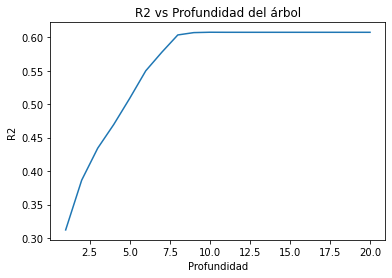

In [177]:
# Vemos la tendencia de las profundidades contra los R2s
plt.plot(max_depth_range,r2s)
plt.title('R2 vs Profundidad del árbol')
plt.ylabel('R2')
plt.xlabel('Profundidad')

In [178]:
# Obtenemos la profundidad que maximiza el r2
best_depth = range(1,21)[r2s.index(max(r2s))]
print(best_depth)

10


In [179]:
# Finalmente se ajusta el modelo con esa profundidad
tree = DecisionTreeRegressor(max_depth=best_depth, random_state = 1)
tree.fit(XTrain,yTrain)
y_pred = tree.predict(XTest)
r2_scores = cross_val_score(tree, XTrain,yTrain, cv=10, scoring='r2')
np.mean(r2_scores)

0.6075443729593147

### Análisis
Como es posible observar, se obtuvo con las variables predictoras "season" y "hour" un r2 de 0.607, un desempeño considerablemente mayor que el r2 obtenido por medio de la regresión lineal, donde el valor máximo de desempeño obtenido fue de 0.215. Por esto, se puede concluir que el modelo de árbol de decisión se ajusta mucho mejor a los datos y captura de mejor forma las relaciones no lineales entre las variables predictoras y la variable de respuesta.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [253]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [258]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [259]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [267]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
# Inicializamos el modelo e iteramos sobre distintos valores de profundidad para calibrar el modelo
accuracies=[]
max_depth_range = range(1, 21)
for depth in max_depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state = 1)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    accuracy = cross_val_score(tree, X_train,y_train, cv=10, scoring='accuracy')
    accuracies.append(np.mean(accuracy))

Text(0.5, 0, 'Profundidad')

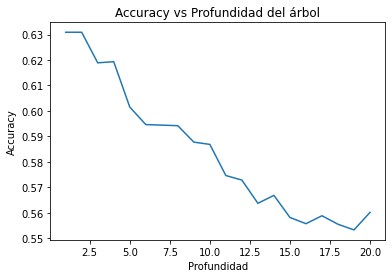

In [270]:
# Vemos la tendencia de las profundidades contra las accuracies
plt.plot(max_depth_range,accuracies)
plt.title('Accuracy vs Profundidad del árbol')
plt.ylabel('Accuracy')
plt.xlabel('Profundidad')

In [271]:
# Obtenemos la profundidad que maximiza el accuracy
best_depth = range(1,21)[accuracies.index(max(accuracies))]
print(best_depth)

1


In [281]:
# Finalmente se ajusta el modelo con esa profundidad óptima
metrics = ['accuracy','f1']
tree = DecisionTreeClassifier(max_depth=best_depth, random_state = 1)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
accuracies = cross_val_score(tree, X_train,y_train, cv=10, scoring='accuracy')
f1s = cross_val_score(tree, X_train,y_train, cv=10, scoring='f1')
vals_metrics = [np.mean(accuracies),np.mean(f1s)]

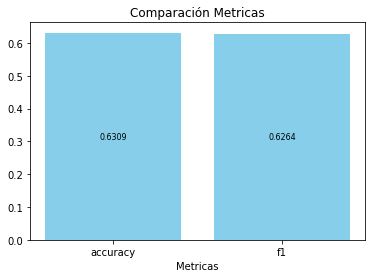

In [284]:
# Grafica comparativa
bars = plt.bar(metrics,vals_metrics,color='skyblue')
plt.xlabel('Metricas')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round(vals_metrics[i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

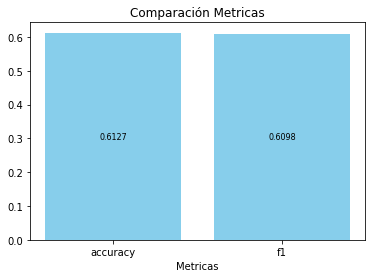

In [286]:
# Regresión logistica
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística
log_reg = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular las metricas

vals_metrics_log = [accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)]

# Grafica comparativa
bars = plt.bar(metrics,vals_metrics_log,color='skyblue')
plt.xlabel('Metricas')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round(vals_metrics_log[i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [347]:
# Celda 7
# Creación de 300 muestras de bootstrap
# cantidad de muestras aleatorias totales a crear 
n_estimators = 300
np.random.seed(1)
# cantidad de registros que debe tener cada muestras (los mismos del conjunto de entrenamiento)
n_samples = X_train.shape[0]
#indices aleatorios con reemplazo para hacer Boostrap
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

boot1 = samples[:100]
boot2 = samples[100:200]
boot3 = samples[200:300]
# Entrenamiento de 100 arboles con 100 muestras boostrap con max_depth = 1, 100 arboles con min_samples_leaf = 5 y
# 100 regresiones logisticas
np.random.seed(1) 
seeds = np.random.randint(1, 10000, size=100)
max_depth=1
min_samples_leaf=5
trees1 = {}
trees2 = {}
reglog = {}

for i in range(len(boot1)):
    trees1[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=max_depth, random_state=seeds[i])
    trees1[i].fit(X_train.iloc[boot1[i]], y_train.iloc[boot1[i]])
for i in range(len(boot2)):
    trees2[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=min_samples_leaf, random_state=seeds[i])
    trees2[i].fit(X_train.iloc[boot2[i]], y_train.iloc[boot2[i]])
for i in range(len(boot3)):
    reglog[i]=LogisticRegression()
    reglog[i].fit(X_train.iloc[boot3[i]], y_train.iloc[boot3[i]])

In [348]:
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(len(boot1)):
    y_pred_df.iloc[:, i] = trees1[i].predict(X_test)
for i in range(len(boot2)):
    y_pred_df.iloc[:, i+100] = trees2[i].predict(X_test)
for i in range(len(boot3)):
    y_pred_df.iloc[:, i+200] = reglog[i].predict(X_test)

Mejor modelo para el arbol con max_depth = 1: 39


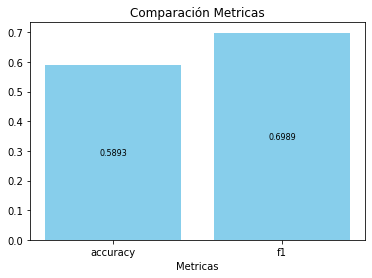

In [349]:
#Revisamos el mejor modelo para cada caso de los modelos implementados segun la metrica del f1
# Para los modelos de arbol con max_depth = 1
f1s1 = []
for model in y_pred_df.iloc[:,:100]:
    f1s1.append(f1_score(y_pred_df[model], y_test))  
    
best_model1 = f1s1.index(max(f1s1))
print('Mejor modelo para el arbol con max_depth = 1:',best_model1)

# Grafica comparativa
bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred_df[best_model1], y_test),f1_score(y_pred_df[best_model1], y_test)],color='skyblue')
plt.xlabel('Metricas')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred_df[best_model1], y_test),f1_score(y_pred_df[best_model1], y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

Mejor modelo para el arbol con min_samples_leaf=5: 14


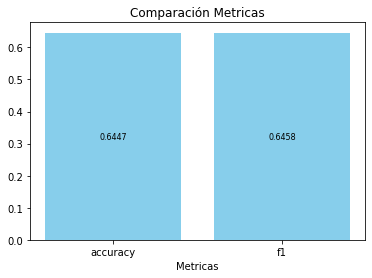

In [340]:
# Para los modelos de arbol con min_samples_leaf=5
f1s2 = []
for model in y_pred_df.iloc[:,100:200]:
    f1s2.append(f1_score(y_pred_df[model], y_test))  
    
best_model2 = f1s2.index(max(f1s2))
print('Mejor modelo para el arbol con min_samples_leaf=5:',best_model2)


# Grafica comparativa
bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred_df[best_model2], y_test),f1_score(y_pred_df[best_model2], y_test)],color='skyblue')
plt.xlabel('Metricas')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred_df[best_model2], y_test),f1_score(y_pred_df[best_model2], y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

Mejor modelo para la regresion logistica: 21


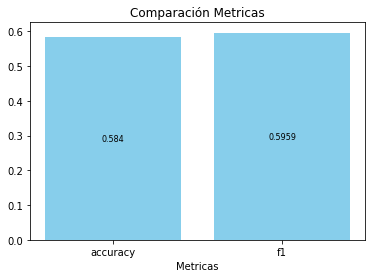

In [341]:
# Para los modelos de regresion logistica
f1s3 = []
for model in y_pred_df.iloc[:,200:300]:
    f1s3.append(f1_score(y_pred_df[model], y_test))  
    
best_model3 = f1s3.index(max(f1s3))
print('Mejor modelo para la regresion logistica:',best_model3)


# Grafica comparativa
bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred_df[best_model3], y_test),f1_score(y_pred_df[best_model3], y_test)],color='skyblue')
plt.xlabel('Metricas')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred_df[best_model3], y_test),f1_score(y_pred_df[best_model3], y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

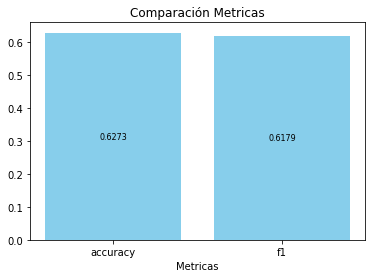

In [344]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
# Grafica comparativa
bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred, y_test),f1_score(y_pred, y_test)],color='skyblue')
plt.xlabel('Metricas')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred, y_test),f1_score(y_pred, y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

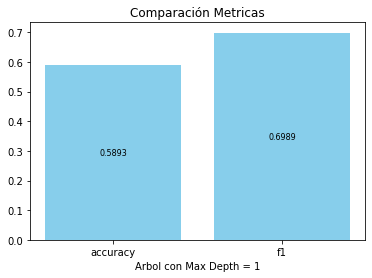

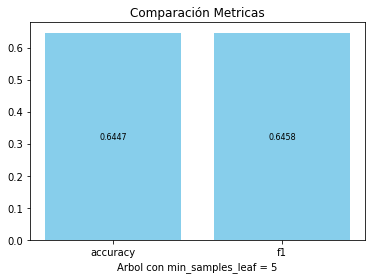

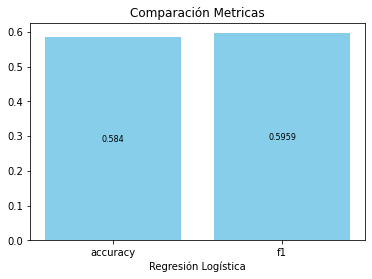

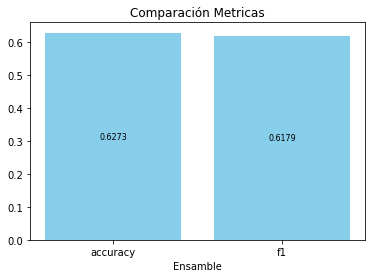

In [346]:
bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred_df[best_model1], y_test),f1_score(y_pred_df[best_model1], y_test)],color='skyblue')
plt.xlabel('Arbol con Max Depth = 1')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred_df[best_model1], y_test),f1_score(y_pred_df[best_model1], y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred_df[best_model2], y_test),f1_score(y_pred_df[best_model2], y_test)],color='skyblue')
plt.xlabel('Arbol con min_samples_leaf = 5')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred_df[best_model2], y_test),f1_score(y_pred_df[best_model2], y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred_df[best_model3], y_test),f1_score(y_pred_df[best_model3], y_test)],color='skyblue')
plt.xlabel('Regresión Logística')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred_df[best_model3], y_test),f1_score(y_pred_df[best_model3], y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred, y_test),f1_score(y_pred, y_test)],color='skyblue')
plt.xlabel('Ensamble')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred, y_test),f1_score(y_pred, y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

### Comparación de resultados

Como es posible observar, el ensamble obtuvo un menor desempeño al comparar con las medidas f1 con respecto al mejor árbol con max_depth = 1 y con respecto al mejor árbol con min_samples_leaf = 5. Sin embargo, en cuanto a accuracy es mejor que el mejor árbol con max_depth = 1 y que la mejor regresión logística. Así, es posible concluir que el rendimiento del ensamble es más pobre que el de un algoritmo con min_samples_leaf = 5 y un poco mejor que el algoritmo de regresión logística y tiene mejor accuracy pero peor f1 que un árbol con max_depth = 1. Esto podría explicarse por qué la votación mayoritaria asigna el mismo peso a todos los modelos y por ejemplo, vemos que al hacer esto, se puede ver empobrecido el desempeño general del ensamble cuando se incluyen modelos que individualmente tienen un desempeño considerablemente más pobre como la regresión logística.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [352]:
# Celda 8
samples_oob = []

n_estimators = 300
np.random.seed(1)
# cantidad de registros que debe tener cada muestras (los mismos del conjunto de entrenamiento)
n_samples = X_train.shape[0]
#indices aleatorios con reemplazo para hacer Boostrap
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

boot1 = samples[:100]
boot2 = samples[100:200]
boot3 = samples[200:300]
# Entrenamiento de 100 arboles con 100 muestras boostrap con max_depth = 1, 100 arboles con min_samples_leaf = 5 y
# 100 regresiones logisticas
np.random.seed(1) 
seeds = np.random.randint(1, 10000, size=100)
max_depth=1
min_samples_leaf=5
trees1 = {}
trees2 = {}
reglog = {}

for i in range(len(boot1)):
    trees1[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=max_depth, random_state=seeds[i])
    trees1[i].fit(X_train.iloc[boot1[i]], y_train.iloc[boot1[i]])
for i in range(len(boot2)):
    trees2[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=min_samples_leaf, random_state=seeds[i])
    trees2[i].fit(X_train.iloc[boot2[i]], y_train.iloc[boot2[i]])
for i in range(len(boot3)):
    reglog[i]=LogisticRegression()
    reglog[i].fit(X_train.iloc[boot3[i]], y_train.iloc[boot3[i]])


# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(len(trees1)):
    y_pred_ = trees1[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
for i in range(len(trees2)):
    y_pred_ = trees2[i].predict(X_train.iloc[samples_oob[i+100]])
    errors[i+100] = 1 - accuracy_score(y_train.iloc[samples_oob[i+100]], y_pred_)
for i in range(len(reglog)):
    y_pred_ = reglog[i].predict(X_train.iloc[samples_oob[i+200]])
    errors[i+200] = 1 - accuracy_score(y_train.iloc[samples_oob[i+200]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

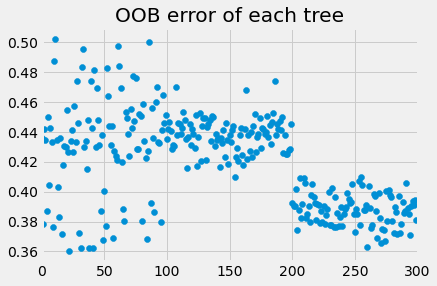

In [353]:
# Visualización de OOB para cada árbol
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [355]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

In [356]:
# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

1483    0.789516
2185    0.702677
2520    0.717930
3721    0.841646
3727    0.169389
4524    0.710354
234     0.082183
4735    0.174859
5839    0.418729
2939    0.737514
3053    0.788499
867     0.764022
276     0.849507
5798    0.114114
3512    0.833976
5789    0.085372
3198    0.757076
5908    0.876721
5718    0.150370
2687    0.134284
dtype: float64

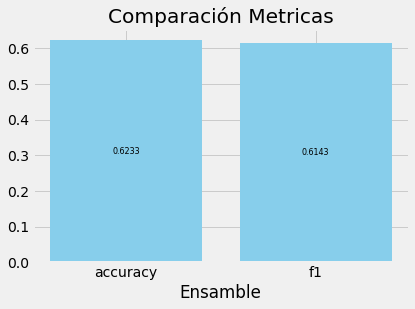

In [361]:
# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
f1_score(y_pred, y_test), accuracy_score(y_pred, y_test)

bars = plt.bar(['accuracy','f1'],
               [accuracy_score(y_pred, y_test),f1_score(y_pred, y_test)],color='skyblue')
plt.xlabel('Ensamble')
plt.title('Comparación Metricas')
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2,
            bars[i].get_height()/2, 
            round([accuracy_score(y_pred, y_test),f1_score(y_pred, y_test)][i],4),
            ha='center',
            va='center',
            color='black',
            fontsize=8)
plt.show()

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Como es posible observar, el resultado del ensamble con votación ponderada es muy similar al obtenido por votación mayoritaria, obteniendo un f1 ligeramente mayor al obtenido por votación mayoritaria y un accuracy ligeramente menor. Sin embargo, ninguno de los 2 ensambles para este contexto presentó una mejoría significativa con respecto a la implementación de los modelos individuales.
Ahora, en cuanto a las posibles ventajas y desventajas de estas metodologías:

**Votación Ponderada:**

**Ventajas:**

**Asignación de pesos**: Permite asignar pesos con respecto al rendimiento esperado de los modelos implementados en el ensamble, lo que permite asignar pesos más altos a modelos que vayan a tener mejor desempeño, contribuyendo a que las predicciones se ajusten mejor a modelos que predicen mejor dentro del ensamble, mejorando así el rendimiento general del ensamble.

**Desventajas:**

**Necesidad de ajuste de pesos:** 
El proceso de ajuste de pesos implica un paso adicional para el proceso de predicción, esto también implica conocer de antemano el rendimiento de cada modelo.
**Propenso a overfitting:** Si los pesos se ajustan demasiado a los datos de entrenamiento, el ensamble puede volverse más propenso al overfitting.

**Votación Mayoritaria:**

**Ventajas:**

**Más simple:** Es fácil de implementar y comprender, ya que simplemente cuenta las predicciones y elige la clase con el mayor número de votos como la predicción final.

**Desventajas:**

**Ignora el desempeño esperado de los modelos individuales:** No tiene en cuenta el desempeño esperado de cada modelo individualmente. Incluso modelos que se espera que sean poco robustos tienen la misma influencia en la predicción final que los modelos más robustos.

**Menor capacidad de ajuste a los datos**: Al tratar todos los modelos por igual, la votación mayoritaria puede tener una capacidad de ajuste inferior a los datos en comparación con la votación ponderada, especialmente si algunos modelos son significativamente menos precisos que otros.

En conclusión, la votación ponderada proporciona mayor flexibilidad, pero requiere ajustes adicionales de pesos y puede ser más propensa al overfitting. La votación mayoritaria, es más simple pero puede tener una capacidad de ajuste inferior a los datos y puede ignorar la confiabilidad de los modelos individuales.